In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

from utils.s3.s3 import *

In [2]:
def show_slices(slices,img):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(11,8)
    for i, slice in enumerate(slices):

        axes[i].imshow(slice.T, cmap="gray", origin="lower")
    plt.suptitle(f"Center slices for current MRI image \n Image size: {img.shape}",fontsize=20)
    # print("image size:",img.shape)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.20)
    plt.show()

def show_brain_center_slice(img: np.memmap):
    slice_0 = img[int(img.shape[0]/2), :, :]
    slice_1 = img[:, int(img.shape[1]/2), :]
    slice_2 = img[:, :, int(img.shape[2]/2)]
    show_slices([slice_0, slice_1, slice_2],img)

# img_stripped = img.copy()
# img_stripped[~mask] = 0

# Testing S3 pre processing pipeline

In [4]:
def set_env_variables():
    print("Setting ANTs and NiftyReg environment variables...\n")
    os.environ['ANTSPATH'] = '/home/lucasthim1/ants/ants_install/bin'
    os.environ['PATH'] =os.environ['PATH'] +  ":" + os.environ['ANTSPATH']
    os.environ['NIFTYREG_INSTALL'] = '/home/lucasthim1/niftyreg/niftyreg_install'
    os.environ['PATH'] = os.environ['PATH'] +  ":" + os.environ['NIFTYREG_INSTALL'] + '/bin'
    
def apply_skull_stripping(input_path,output_path,type='simple'):
    if not os.path.exists(output_path):
        print("Creating output path... \n")
        os.makedirs(output_path)

    start = time.time()
    skull_stripper = SkullStripper(input_path, output_path, want_tissues=False, want_atlas=False)
    if type ==  'simple':
        skull_stripper.simple_strip_skull()
    else:
        skull_stripper.strip_skull()
    total_time = (time.time() - start) / 60.
    print('Done! Process took %.2f min)' % total_time)

In [5]:
set_env_variables()

Setting ANTs and NiftyReg environment variables...



In [16]:
# !python ./../process_images/s3/s3.py -i "/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4225/MT1__N3m/2011-09-21_10_09_36.0/S122881/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686.nii"

## Checking image and masks - Patient 002_S_4225

In [15]:
main_dir = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/'
input_path = main_dir + "002_S_4225/MT1__N3m/2011-09-21_10_09_36.0/S122881/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686.nii"
output_path = main_dir + "002_S_4225"
apply_skull_stripping(input_path,output_path)

Skull stripping started. 
 --------------------------- 

Input Modality: ../data/ADNI/002_S_4225/MT1__N3m/2011-09-21_10_09_36.0/S122881/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686.nii 

Output Folder : /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/002_S_4225 


Compute basic mask: 
 -----------------

 Deformable tissue registration started 
 -----------------
csf image is saved to: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/002_S_4225/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_csf.nii.gz
gm image is saved to: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/002_S_4225/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_gm.nii.gz
wm image is saved to: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/002_S_4225/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_wm.nii.gz

Computing refined mask 
 -------------
Applying refined mask 

Results save as /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/0

### Raw image

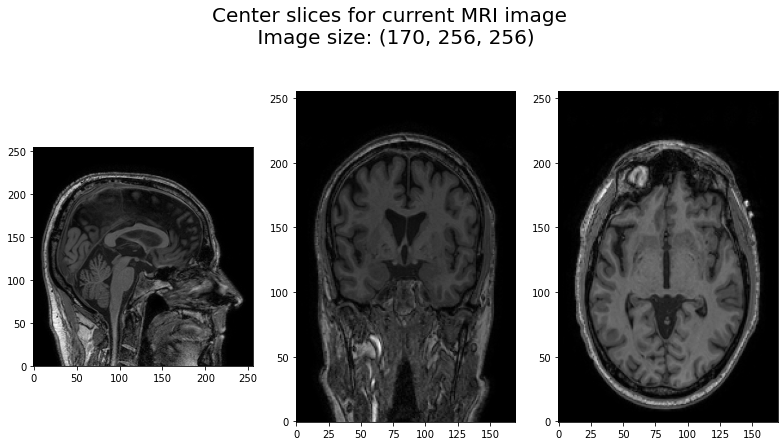

In [67]:
main_dir = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/'
input_path = main_dir + "002_S_4225/MT1__N3m/2011-09-21_10_09_36.0/S122881/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686.nii"
output_path = main_dir + "002_S_4225"
img = nib.load(input_path).get_fdata()
show_brain_center_slice(img)

### Refined mask (Final result)

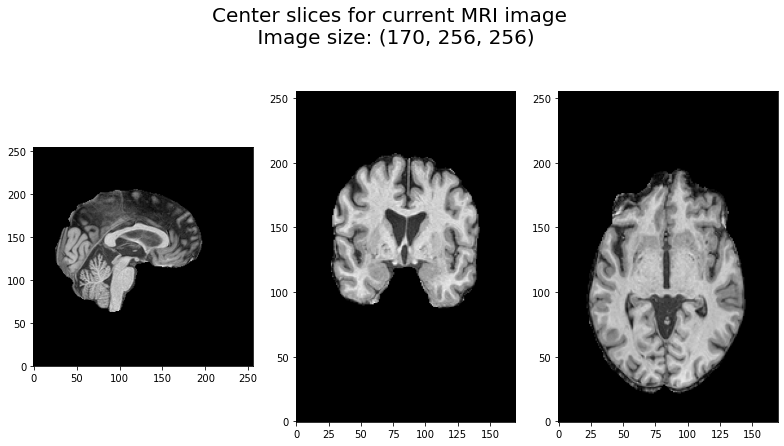

In [68]:
refined_mask_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/002_S_4225/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_masked.nii.gz'
mask_img = nib.load(refined_mask_path).get_fdata()
show_brain_center_slice(mask_img)

### Same image but with simple skull stripping (only rigid transformation)

In [22]:
main_dir = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/'
input_path = main_dir + "002_S_4225/MT1__N3m/2011-09-21_10_09_36.0/S122881/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686.nii"
output_path = main_dir + "002_S_4225_simple"
apply_skull_stripping(input_path,output_path)

Skull stripping started. 
 --------------------------- 

Input Modality: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4225/MT1__N3m/2011-09-21_10_09_36.0/S122881/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686.nii 

Output Folder : /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4225_simple 


Compute basic mask: 
 -----------------
Done! Process took 0.14 min)


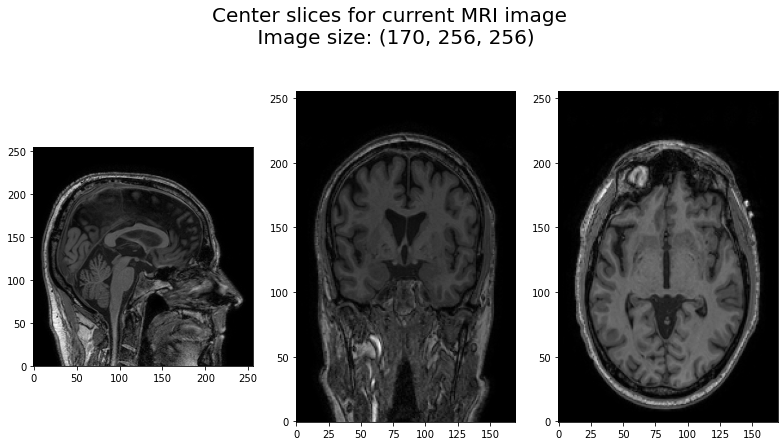

In [23]:
img = nib.load(input_path).get_fdata()
show_brain_center_slice(img)

In [25]:
os.listdir(main_dir + "002_S_4225_simple/")

['ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_csf.nii.gz',
 'ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_gm.nii.gz',
 'ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_masked_basic.nii.gz',
 'ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_atlas_reg.nii',
 'ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_atlas_reg.nii0GenericAffine.mat',
 'ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_wm.nii.gz',
 'ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_mask.nii.gz',
 'masked_atlas.nii.gz']

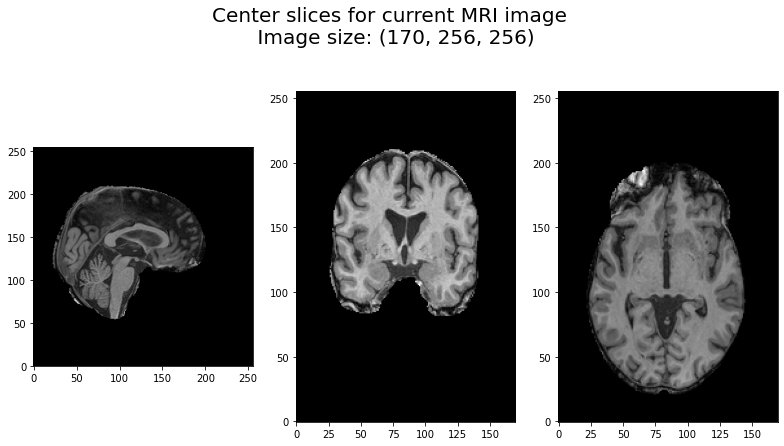

In [26]:
input_path = main_dir + "002_S_4225_simple/ADNI_002_S_4225_MR_MT1__N3m_Br_20110928092836722_S122881_I258686_masked_basic.nii.gz"
img = nib.load(input_path).get_fdata()
show_brain_center_slice(img)

Here, it is possible to notice that the brain does not suffer defformation or morphology changes

## Checking image and masks - Patient 002_S_4171

In [50]:
main_dir = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/'
input_path = main_dir + "002_S_4171/MT1__N3m/2011-08-08_17_22_19.0/S118013/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649.nii"
output_path = main_dir + "002_S_4171"
apply_skull_stripping(input_path,output_path)

Skull stripping started. 
 --------------------------- 

Input Modality: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171/MT1__N3m/2011-08-08_17_22_19.0/S118013/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649.nii 

Output Folder : /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171 


Compute basic mask: 
 -----------------

 Deformable tissue registration started 
 -----------------
csf image is saved to: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649_csf.nii.gz
gm image is saved to: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649_gm.nii.gz
wm image is saved to: /home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649_wm.nii.gz

Computing refined mask 
 -------------
Applying refined mask 

Resul

TypeError: must be real number, not str

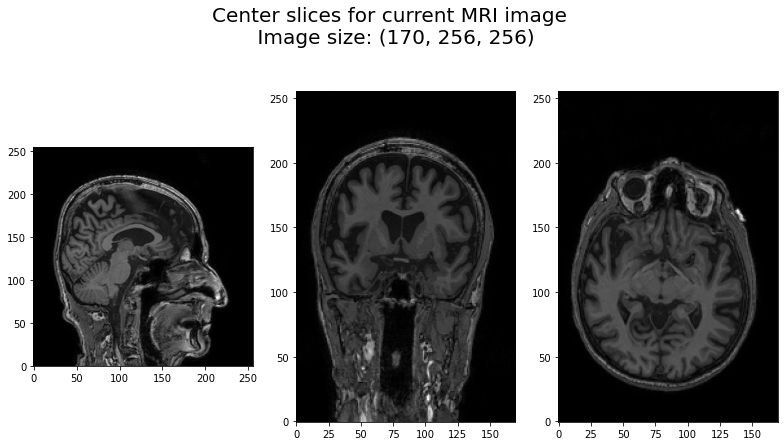

In [27]:
main_dir = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/'
input_path = main_dir + "002_S_4171/MT1__N3m/2011-08-08_17_22_19.0/S118013/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649.nii"
output_path = main_dir + "002_S_4171"
img = nib.load(input_path).get_fdata()
show_brain_center_slice(img)

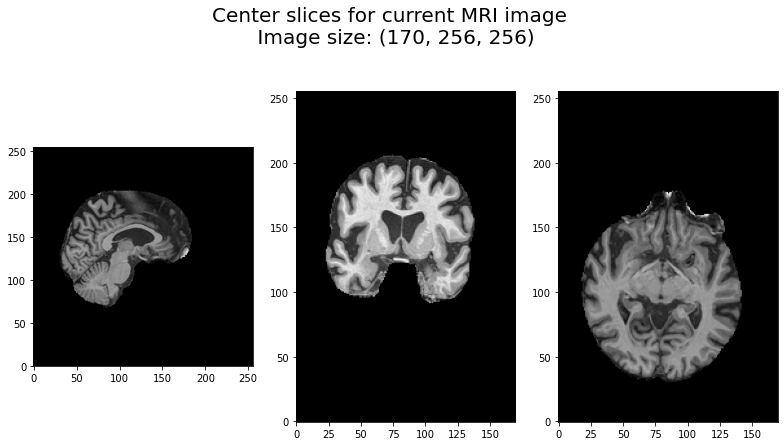

In [81]:
refined_mask_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649_masked_basic.nii.gz'
mask_img = nib.load(refined_mask_path).get_fdata()
show_brain_center_slice(mask_img)

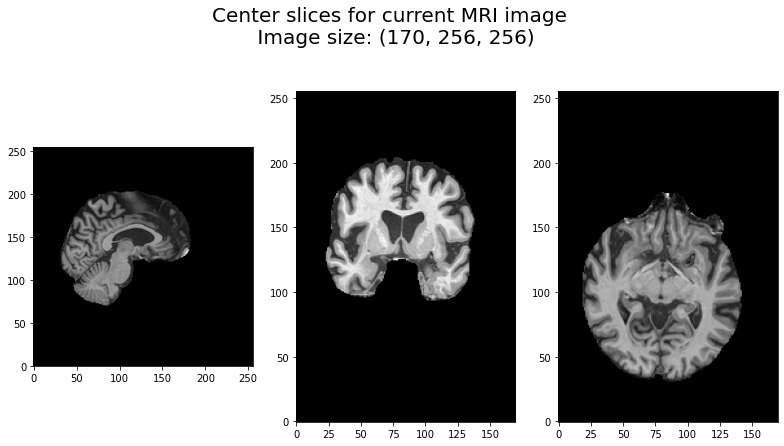

In [82]:
refined_mask_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/data/ADNI/002_S_4171/ADNI_002_S_4171_MR_MT1__N3m_Br_20110816094410627_S118013_I250649_masked.nii.gz'
mask_img = nib.load(refined_mask_path).get_fdata()
show_brain_center_slice(mask_img)

## Checking Registration Atlas

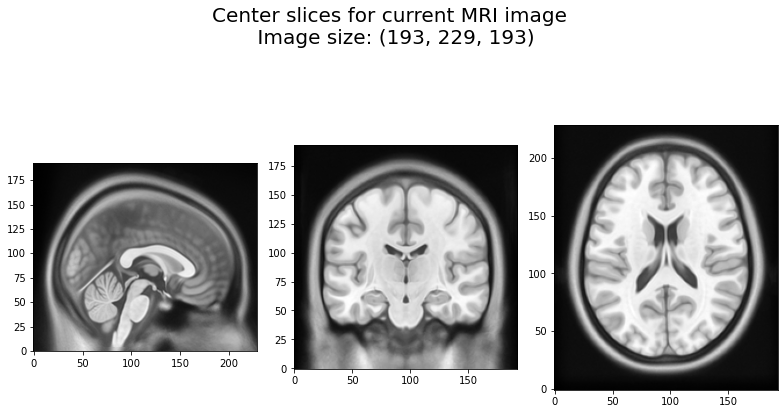

In [72]:
atlas = '/home/lucasthim1/mmml-alzheimer-diagnosis/src/playground/utils/s3/Atlas/atlas_t1.nii'
atlas_img = nib.load(atlas).get_fdata()
show_brain_center_slice(atlas_img)

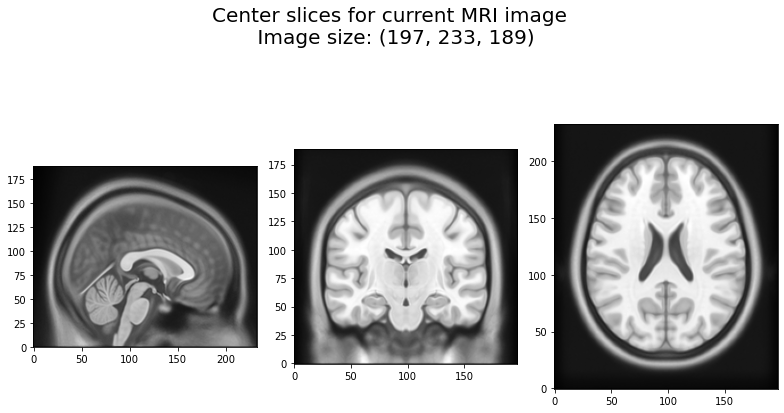

In [80]:
atlas_dir = '/home/lucasthim1//alzheimer_bucket/atlas/ICBM152_2009a_nonlinear_symmetric/'
# os.listdir(atlas_dir)
atlas =atlas_dir + 'mni_icbm152_t1_tal_nlin_sym_09a.nii'
atlas_img = nib.load(atlas).get_fdata()
show_brain_center_slice(atlas_img)